In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from matplotlib.patches import Patch

In [9]:
!head -n 30 /Users/david/Downloads/NetworkRegulatorGene.tsv

# License
#	# RegulonDB is free for academic/noncommercial use
# User is not entitled to change or erase data sets of the RegulonDB
# database or to eliminate copyright notices from RegulonDB. Furthermore,
# User is not entitled to expand RegulonDB or to integrate RegulonDB partly
# or as a whole into other databank systems, without prior written consent
# from CCG-UNAM.
# Please check the license at https://regulondb.ccg.unam.mx/manual/aboutUs/terms-conditions
# Citation
#	# Heladia Salgado, Socorro Gama-Castro, et al., RegulonDB v12.0: a comprehensive resource of transcriptional regulation in E. coli K-12,
# Nucleic Acids Research, 2023;, gkad1072, https://doi.org/10.1093/nar/gkad1072
# RegulonDB Release: 13.5
# Contact
#	email:regulondb@ccg.unam.mx
#Date:
#	01-28-2025
## Columns:
## (1) regulatorId. Regulator identifier
## (2) regulatorName. Regulator Name
## (3) regulatorGeneName. Gene(s) coding for the TF
## (4) regulatedId. Gene ID regulated by the Regulator (regulated Gene)
## (

In [41]:
# Load your csv file
df = pd.read_csv('/Users/david/Downloads/NetworkRegulatorGene.tsv', sep='\t', header=24)
df.columns = df.columns.str.replace('^\\d+\\)', '', regex=True)
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('^([a-zA-Z])', lambda x: x.group(1).lower(), regex=True)
df.sample(n=5)

,regulatorId,regulatorName,regulatorGeneName,regulatedId,regulatedName,function,confidenceLevel
234,RDBECOLICNC00063,ppGpp,NaN,RDBECOLIGNC02760,ytiC,+,W
7109,RDBECOLITFC00216,OxyR,oxyR,RDBECOLIGNC03868,znuC,+,S
6032,RDBECOLITFC00189,CRP,crp,RDBECOLIGNC00364,gcvH,+,C
4087,RDBECOLITFC00109,ArgR,argR,RDBECOLIGNC02023,hisQ,-,C
425,RDBECOLIPDC03275,GcvB,gcvB,RDBECOLIGNC02306,cycA,-,W


Text(0.5, 0, 'Regulator Name')

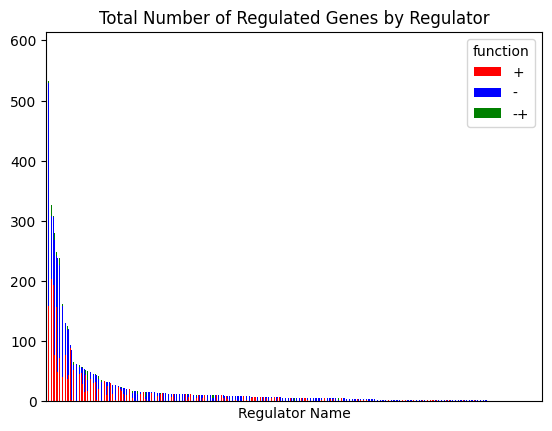

In [35]:
regulated_counts = df.groupby(['regulatorName', 'function'])['regulatedName'].count().unstack('function').fillna(0)

# Add a total column and sort by it
regulated_counts['total'] = regulated_counts.sum(axis=1)
regulated_counts = regulated_counts.sort_values('total', ascending=False)

# Drop the total column before plotting
regulated_counts = regulated_counts.drop(columns='total')

# Plot the stacked bar chart
regulated_counts.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'])
plt.xticks([])
plt.title('Total Number of Regulated Genes by Regulator')
plt.xlabel('Regulator Name')

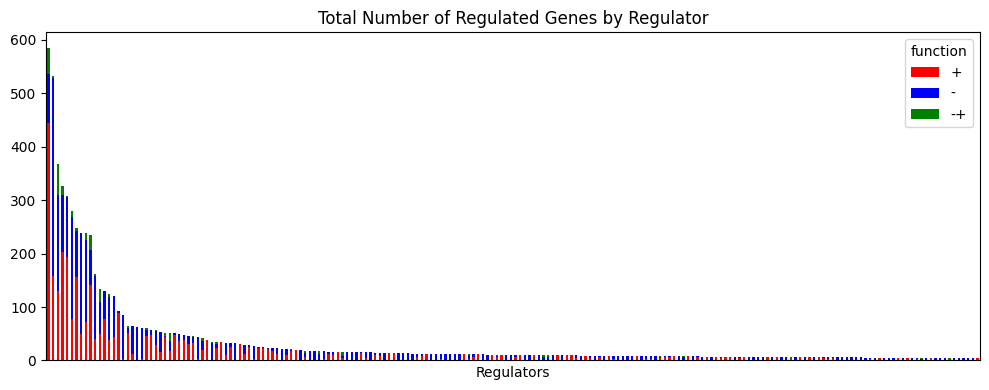

In [36]:
#plt.figure(figsize = (15, 5))
regulated_counts[:200].plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], figsize=(10, 4))
plt.xticks([])
plt.title('Total Number of Regulated Genes by Regulator')
plt.xlabel('Regulators')
plt.tight_layout()
#plt.show()
plt.savefig('all_TFs.svg')

Text(0.5, 0, 'Regulator Name')

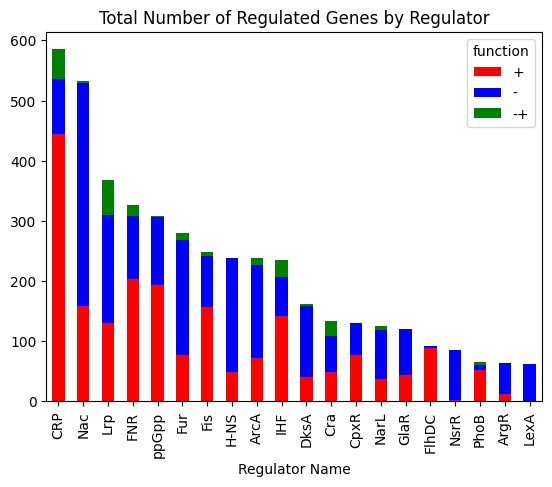

In [37]:
# Plot the stacked bar chart
regulated_counts.iloc[:20].plot(kind='bar', stacked=True, color=['red', 'blue', 'green'])

plt.title('Total Number of Regulated Genes by Regulator')
plt.xlabel('Regulator Name')

In [ ]:
# Get a unique list of 'Regulator_Name' values where 'Regulator_Gene_Name' is NaN
unique_nan_regulator_names = df[df['regulatorGeneName'].isna()]['regulatorName'].unique()
print(unique_nan_regulator_names)

['ppGpp']


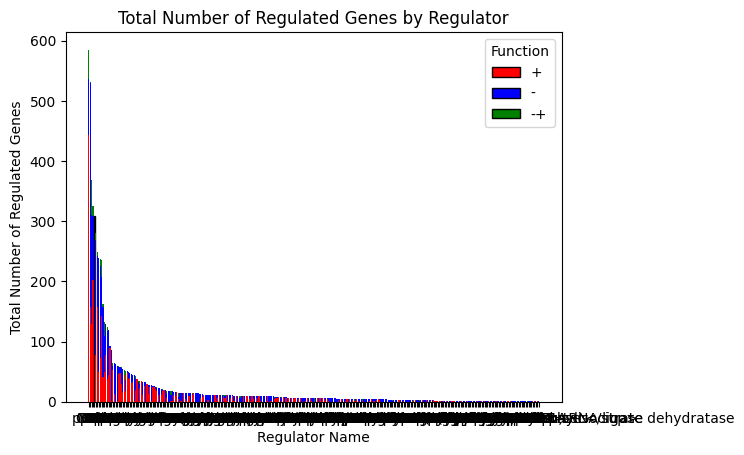

In [43]:
# Calculate the total number of regulated genes for each regulator
regulated_counts = df.groupby(['regulatorName', 'function'])['regulatedName'].count().unstack('function').fillna(0)

# Add a total column and sort by it
regulated_counts['total'] = regulated_counts.sum(axis=1)
regulated_counts = regulated_counts.sort_values('total', ascending=False)

# Drop the total column before plotting
regulated_counts = regulated_counts.drop(columns='total')

# Define the colors for each function
colors = {'+': 'red', '-': 'blue', '-+': 'green'}

# Create the figure and axis
fig, ax = plt.subplots()

# Plot each bar individually
for i, (index, row) in enumerate(regulated_counts.iterrows()):
    bottom = 0
    for function in regulated_counts.columns:
        if index == 'ppGpp':
            ax.bar(i, row[function], bottom=bottom, color=colors[function], edgecolor='black', hatch='//')
        else:
            ax.bar(i, row[function], bottom=bottom, color=colors[function])
        bottom += row[function]

# Set the x-ticks to be the regulator names
ax.set_xticks(np.arange(len(regulated_counts)))
ax.set_xticklabels(regulated_counts.index)

# Create a list of Patch objects for the legend
legend_patches = [Patch(facecolor=colors[function], edgecolor='black', label=function) for function in colors.keys()]

# Add the legend to the plot
plt.legend(handles=legend_patches, title='Function')

plt.title('Total Number of Regulated Genes by Regulator')
plt.xlabel('Regulator Name')
plt.ylabel('Total Number of Regulated Genes')

plt.show()

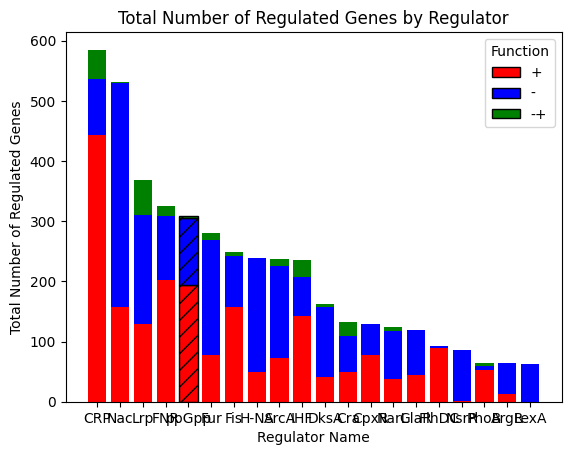

In [44]:
# Calculate the total number of regulated genes for each regulator
regulated_counts = df.groupby(['regulatorName', 'function'])['regulatedName'].count().unstack('function').fillna(0)

# Add a total column and sort by it
regulated_counts['total'] = regulated_counts.sum(axis=1)
regulated_counts = regulated_counts.sort_values('total', ascending=False)

# Drop the total column before plotting
regulated_counts = regulated_counts.drop(columns='total')

# Select the first 20 rows
regulated_counts = regulated_counts.iloc[:20]

# Define the colors for each function
colors = {'+': 'red', '-': 'blue', '-+': 'green'}

# Create the figure and axis
fig, ax = plt.subplots()

# Plot each bar individually
for i, (index, row) in enumerate(regulated_counts.iterrows()):
    bottom = 0
    for function in regulated_counts.columns:
        if index == 'ppGpp':
            ax.bar(i, row[function], bottom=bottom, color=colors[function], edgecolor='black', hatch='//')
        else:
            ax.bar(i, row[function], bottom=bottom, color=colors[function])
        bottom += row[function]

# Set the x-ticks to be the regulator names
ax.set_xticks(np.arange(len(regulated_counts)))
ax.set_xticklabels(regulated_counts.index)

# Create a list of Patch objects for the legend
legend_patches = [Patch(facecolor=colors[function], edgecolor='black', label=function) for function in colors.keys()]

# Add the legend to the plot
plt.legend(handles=legend_patches, title='Function')

plt.title('Total Number of Regulated Genes by Regulator')
plt.xlabel('Regulator Name')
plt.ylabel('Total Number of Regulated Genes')

plt.show()

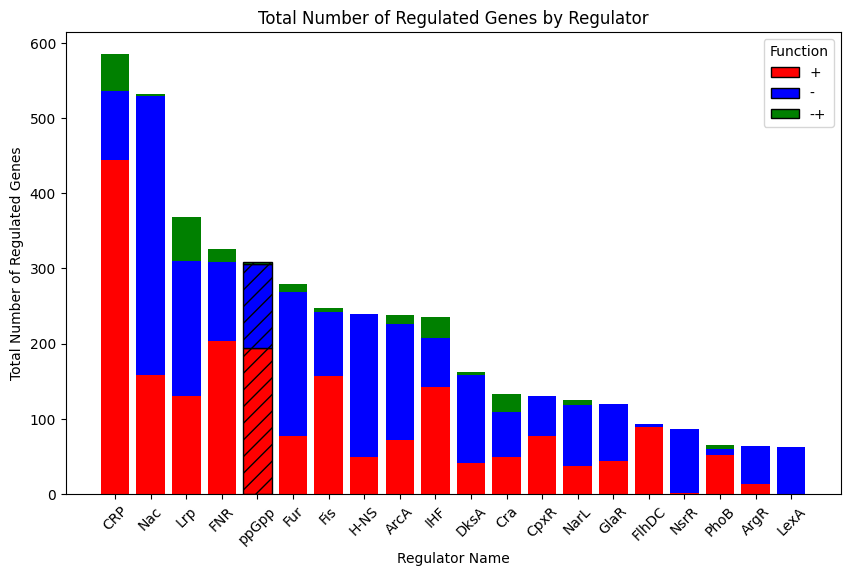

In [45]:
# Calculate the total number of regulated genes for each regulator
regulated_counts = df.groupby(['regulatorName', 'function'])['regulatedName'].count().unstack('function').fillna(0)

# Add a total column and sort by it
regulated_counts['total'] = regulated_counts.sum(axis=1)
regulated_counts = regulated_counts.sort_values('total', ascending=False)

# Drop the total column before plotting
regulated_counts = regulated_counts.drop(columns='total')

# Select the first 20 rows
regulated_counts = regulated_counts.iloc[:20]

# Define the colors for each function
colors = {'+': 'red', '-': 'blue', '-+': 'green'}

# Create the figure and axis with a specific figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each bar individually
for i, (index, row) in enumerate(regulated_counts.iterrows()):
    bottom = 0
    for function in regulated_counts.columns:
        if index == 'ppGpp':
            ax.bar(i, row[function], bottom=bottom, color=colors[function], edgecolor='black', hatch='//')
        else:
            ax.bar(i, row[function], bottom=bottom, color=colors[function])
        bottom += row[function]

# Set the x-ticks to be the regulator names and rotate them
ax.set_xticks(np.arange(len(regulated_counts)))
ax.set_xticklabels(regulated_counts.index, rotation=45)

# Create a list of Patch objects for the legend
legend_patches = [Patch(facecolor=colors[function], edgecolor='black', label=function) for function in colors.keys()]

# Add the legend to the plot
plt.legend(handles=legend_patches, title='Function')

plt.title('Total Number of Regulated Genes by Regulator')
plt.xlabel('Regulator Name')
plt.ylabel('Total Number of Regulated Genes')

plt.show()

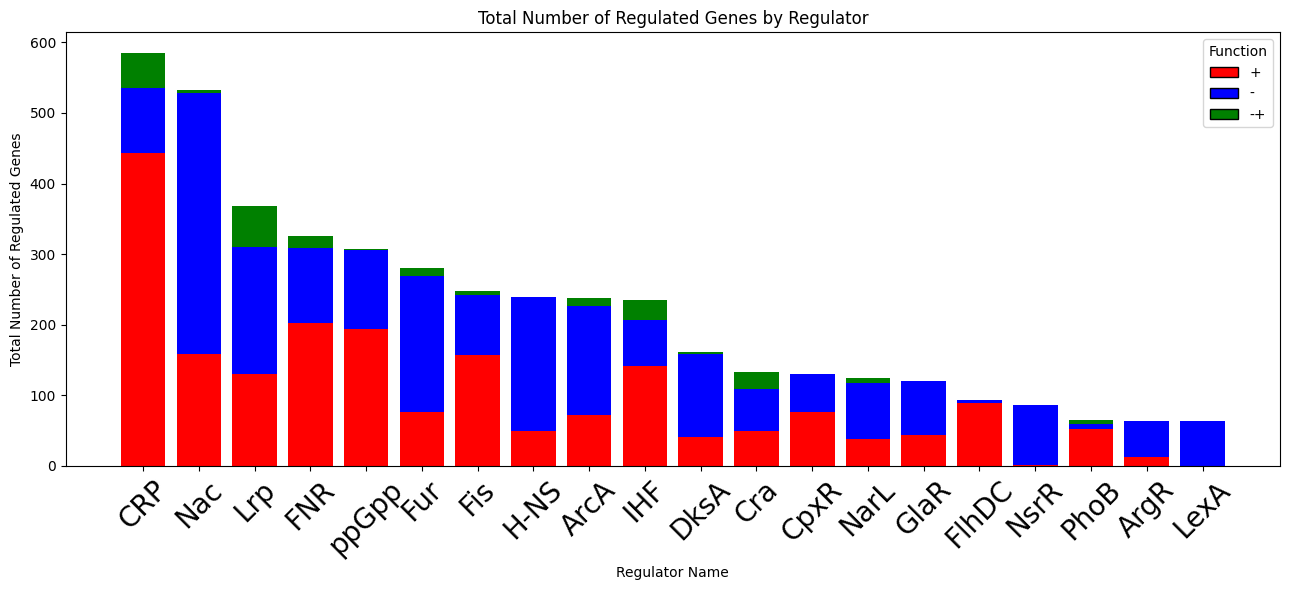

In [46]:
# Calculate the total number of regulated genes for each regulator
regulated_counts = df.groupby(['regulatorName', 'function'])['regulatedName'].count().unstack('function').fillna(0)

# Add a total column and sort by it
regulated_counts['total'] = regulated_counts.sum(axis=1)
regulated_counts = regulated_counts.sort_values('total', ascending=False)

# Drop the total column before plotting
regulated_counts = regulated_counts.drop(columns='total')

# Select the first 20 rows
regulated_counts = regulated_counts.iloc[:20]

# Define the colors for each function
colors = {'+': 'red', '-': 'blue', '-+': 'green'}

# Create the figure and axis with a specific figure size
fig, ax = plt.subplots(figsize=(13, 6))

# Plot each bar individually
for i, (index, row) in enumerate(regulated_counts.iterrows()):
    bottom = 0
    for function in regulated_counts.columns:
        if index == 'ppGpp':
            ax.bar(i, row[function], bottom=bottom, color=colors[function])#, edgecolor='black', hatch='//')
        else:
            ax.bar(i, row[function], bottom=bottom, color=colors[function])
        bottom += row[function]

# Set the x-ticks to be the regulator names and rotate them
ax.set_xticks(np.arange(len(regulated_counts)))
ax.set_xticklabels(regulated_counts.index, rotation=45)

# Create a list of Patch objects for the legend
legend_patches = [Patch(facecolor=colors[function], edgecolor='black', label=function) for function in colors.keys()]

# Add the legend to the plot
plt.legend(handles=legend_patches, title='Function')
plt.xticks(fontsize = 20)
plt.title('Total Number of Regulated Genes by Regulator')
plt.xlabel('Regulator Name')
plt.ylabel('Total Number of Regulated Genes')
plt.tight_layout()
plt.savefig('selected_regulators.svg')
#plt.show()

In [48]:
G = nx.from_pandas_edgelist(df, 'regulatorName', 'regulatedName', create_using=nx.DiGraph())

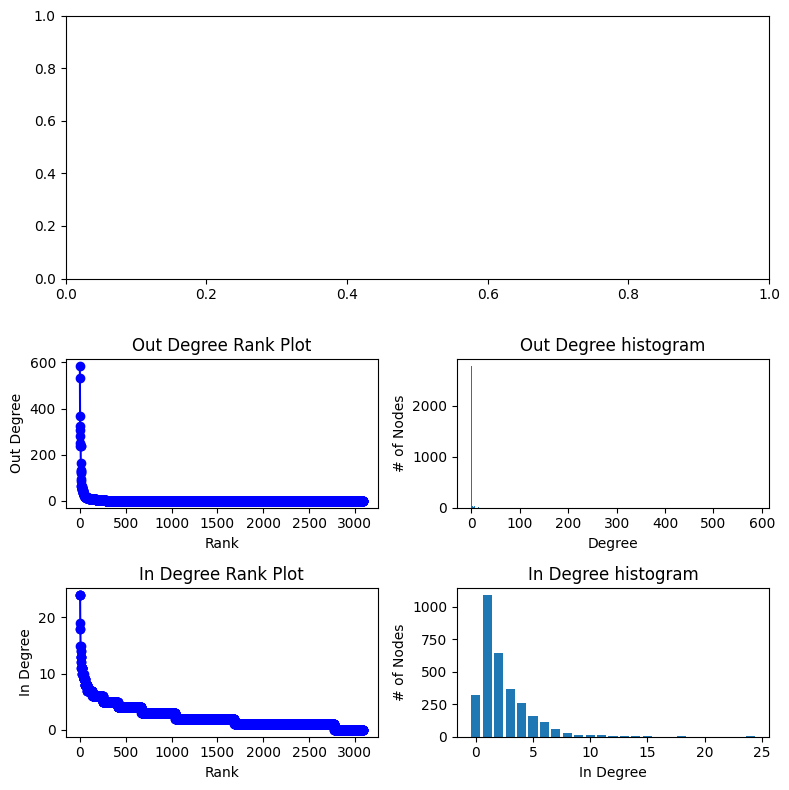

In [50]:
out_degree_sequence = sorted((d for n, d in G.out_degree()), reverse=True)
in_degree_sequence = sorted((d for n, d in G.in_degree()), reverse=True)
d_out_max = max(out_degree_sequence)
d_in_max = max(in_degree_sequence)

fig = plt.figure("Degrees of power law graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(3+2+2, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.strongly_connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, k=30)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Largest strongly Connected component of G")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:5, :2])
ax1.plot(out_degree_sequence, "b-", marker="o")
ax1.set_title("Out Degree Rank Plot")
ax1.set_ylabel("Out Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:5, 2:])
ax2.bar(*np.unique(out_degree_sequence, return_counts=True))
ax2.set_title("Out Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

ax1 = fig.add_subplot(axgrid[5:7, :2])
ax1.plot(in_degree_sequence, "b-", marker="o")
ax1.set_title("In Degree Rank Plot")
ax1.set_ylabel("In Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[5:7, 2:])
ax2.bar(*np.unique(in_degree_sequence, return_counts=True))
ax2.set_title("In Degree histogram")
ax2.set_xlabel("In Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

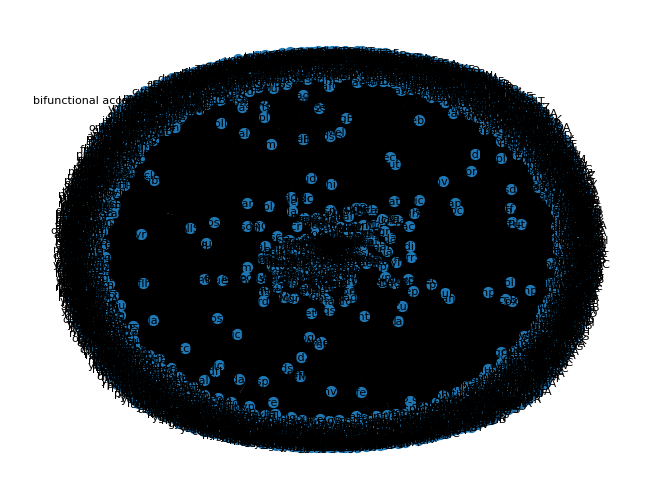

In [49]:
nx.draw(G, with_labels=True, node_size=50, font_size=8)